Name: Saher Saeed <br />
Student Number: 23095056 <br /> 
GitHub Repository: https://github.com/saeedsahar/statistics-and-trends.git

# Dataset Overview
The dataset provides insight into smoking habits in the United Kingdom. While analysing the data
 we will explore various demographics of the data, such as age, gender, income, and marital status, that may lead to smoking behaviour, as well as inspect the relationships between these factors.

**Data Card:** <br>
Gender: Female, Male<br>
Age: Years<br>
Marital Status: Divorced, Married, Separated, Single, Widowed<br>
Education: A Levels, Degree, GCSE, Higher/Sub Degree, No Qualification, ONC/BTEC, Other<br>
Nationality: British, English, Irish, Scottish, Welsh, Other<br>
Ethnicity: Asian, Black, Chinese, Mixed, White, Refused<br>
Income: Under £2,600 to Above £36,400, Refused, Unknown<br>
Region: London, Midlands, Scotland, South East, South West, The North, Wales<br>
Smoking Status: Yes, No<br>
Smoking Frequency: Avg. cigarettes per day (Weekdays/Weekends)<br>
Cigarette Type: Packets, Hand-Rolled, Mixed

**Data Size:**<br>
Rows: 1691

In [1600]:


import pandas as pd
import seaborn as sns
import numpy as np


import matplotlib.pyplot as plt

file_path = 'dataset/smoking.csv'

# Load the file into a DataFrame
df = pd.read_csv(file_path)


# Explore the Data

In [1601]:
df.shape

(1691, 13)

In [1602]:
# Display first few records of the DataFrame
print(df.head())

   Unnamed: 0  gender  age marital_status highest_qualification nationality  \
0           1    Male   38       Divorced      No Qualification     British   
1           2  Female   42         Single      No Qualification     British   
2           3    Male   40        Married                Degree     English   
3           4  Female   40        Married                Degree     English   
4           5  Female   39        Married          GCSE/O Level     British   

  ethnicity      gross_income     region smoke  amt_weekends  amt_weekdays  \
0     White    2,600 to 5,200  The North    No           NaN           NaN   
1     White       Under 2,600  The North   Yes          12.0          12.0   
2     White  28,600 to 36,400  The North    No           NaN           NaN   
3     White  10,400 to 15,600  The North    No           NaN           NaN   
4     White    2,600 to 5,200  The North    No           NaN           NaN   

      type  
0      NaN  
1  Packets  
2      NaN  
3   

In [1603]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1691 non-null   int64  
 1   gender                 1691 non-null   object 
 2   age                    1691 non-null   int64  
 3   marital_status         1691 non-null   object 
 4   highest_qualification  1691 non-null   object 
 5   nationality            1691 non-null   object 
 6   ethnicity              1691 non-null   object 
 7   gross_income           1691 non-null   object 
 8   region                 1691 non-null   object 
 9   smoke                  1691 non-null   object 
 10  amt_weekends           421 non-null    float64
 11  amt_weekdays           421 non-null    float64
 12  type                   421 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 171.9+ KB
None


In [1604]:
df.describe()

,Unnamed: 0,age,amt_weekends,amt_weekdays
count,1691.000000,1691.000000,421.000000,421.000000
mean,846.000000,49.836192,16.410926,13.750594
std,488.293969,18.736851,9.892988,9.388292
min,1.000000,16.000000,0.000000,0.000000
25%,423.500000,34.000000,10.000000,7.000000
50%,846.000000,48.000000,15.000000,12.000000
75%,1268.500000,65.500000,20.000000,20.000000
max,1691.000000,97.000000,60.000000,55.000000


# To clean up the data and prepare it for analysis, we can perform the following steps:

**1. Handle Missing Values**

In [1605]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0                  0
gender                      0
age                         0
marital_status              0
highest_qualification       0
nationality                 0
ethnicity                   0
gross_income                0
region                      0
smoke                       0
amt_weekends             1270
amt_weekdays             1270
type                     1270
dtype: int64


**2. Remove duplicates from the data**


In [1606]:
# df.drop_duplicates(inplace=True)

**3. Drop column unnamed to make the data consistent**

In [1607]:
df.drop(columns='Unnamed: 0',inplace=True)


# Data preparation for further analysis.

In [1608]:
# Select rows where smoke is 'Yes'
# Set amt_weekends and amt_weekdays to 0 for those rows

smoker_rows = df.loc[df['smoke'] == 'Yes']
df.loc[smoker_rows.index, ['amt_weekends', 'amt_weekdays']] > 0

,amt_weekends,amt_weekdays
1,True,True
6,True,True
8,True,True
9,True,True
20,True,True
...,...,...
1674,True,True
1680,True,True
1683,True,True
1687,True,True


In [1609]:
highest_qualification = df['highest_qualification'].value_counts().reset_index()
highest_qualification

,highest_qualification,count
0,No Qualification,586
1,GCSE/O Level,308
2,Degree,262
3,Other/Sub Degree,127
4,Higher/Sub Degree,125
5,A Levels,105
6,GCSE/CSE,102
7,ONC/BTEC,76


In [1610]:
gender = df['gender'].value_counts().reset_index()
gender

,gender,count
0,Female,965
1,Male,726


In [1611]:
male_female_smoke = df[df['smoke'] == 'Yes'].groupby('gender').value_counts().reset_index()
male_female_smoke

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type,count
0,Female,16,Single,GCSE/CSE,British,White,"Under 2,600",Midlands & East Anglia,Yes,2.0,2.0,Packets,1
1,Female,16,Single,GCSE/O Level,British,White,"5,200 to 10,400",The North,Yes,12.0,12.0,Packets,1
2,Female,17,Single,GCSE/CSE,Scottish,White,"5,200 to 10,400",Scotland,Yes,20.0,15.0,Packets,1
3,Female,17,Single,GCSE/O Level,English,White,"Under 2,600",South West,Yes,20.0,10.0,Both/Mainly Packets,1
4,Female,18,Single,GCSE/O Level,British,White,Refused,The North,Yes,8.0,8.0,Hand-Rolled,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,Male,77,Divorced,Other/Sub Degree,English,White,"5,200 to 10,400",Scotland,Yes,20.0,10.0,Packets,1
417,Male,77,Married,No Qualification,English,White,"2,600 to 5,200",South East,Yes,15.0,15.0,Packets,1
418,Male,78,Widowed,No Qualification,British,White,"5,200 to 10,400",South West,Yes,15.0,12.0,Packets,1
419,Male,78,Widowed,No Qualification,English,White,"5,200 to 10,400",The North,Yes,50.0,50.0,Both/Mainly Packets,1


In [1612]:
avg_age = df.groupby('gender')['age'].mean().reset_index()
avg_age

,gender,age
0,Female,50.348187
1,Male,49.155647


In [1613]:
marital_status = df['marital_status'].value_counts().reset_index()
marital_status

,marital_status,count
0,Married,812
1,Single,427
2,Widowed,223
3,Divorced,161
4,Separated,68


In [1614]:
malefemalesmoke = male_female_smoke['gender'].value_counts().reset_index()
malefemalesmoke

,gender,count
0,Female,234
1,Male,187


In [1615]:
df['amt_total'] = df['amt_weekends'] + df['amt_weekdays']

In [1616]:
#Remove any rows where gross_income is NaN after conversion
# df = df.dropna(subset=['gross_income'])
# df['gross_income'] = pd.to_numeric(df['gross_income'], errors='coerce')

print(df[['amt_weekends', 'amt_weekdays']].describe())
print(df[['amt_weekends', 'amt_weekends']].isnull().sum()) 

df.head()


       amt_weekends  amt_weekdays
count    421.000000    421.000000
mean      16.410926     13.750594
std        9.892988      9.388292
min        0.000000      0.000000
25%       10.000000      7.000000
50%       15.000000     12.000000
75%       20.000000     20.000000
max       60.000000     55.000000
amt_weekends    1270
amt_weekends    1270
dtype: int64


,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type,amt_total
0,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN,NaN
1,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets,24.0
2,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN,NaN
3,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN,NaN
4,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN,NaN


In [1617]:
# Function to convert the range 
def convert_income_to_numeric(income_range):
    if income_range == 'Refused':
        return None  # Or assign a
    if 'to' in income_range:
        lower, upper = income_range.split(' to ')
        lower = int(lower.replace(',', ''))
        upper = int(upper.replace(',', ''))
        return (lower + upper) / 2
    elif 'Under' in income_range:
        return int(income_range.split()[1].replace(',', '')) / 2
    elif 'Above' in income_range:
        return 36400  
    else:
        try:
            return float(income_range.replace(',', ''))
        except ValueError:
            return None  # Handle exception


In [1618]:
    # print(df.head()) 
    qualifications_smoke = df.groupby(['highest_qualification', 'smoke']).size().unstack(fill_value=0)
    qualifications_smoke = qualifications_smoke.reset_index()
    qualifications_smoke

smoke,highest_qualification,No,Yes
0,A Levels,84,21
1,Degree,223,39
2,GCSE/CSE,64,38
3,GCSE/O Level,203,105
4,Higher/Sub Degree,98,27
5,No Qualification,449,137
6,ONC/BTEC,53,23
7,Other/Sub Degree,96,31


# Visualization and Analysis¶
# 

Pie chart function

In [1619]:
def male_female_smoke_distribution():
    plt.figure(figsize=(6, 6))
    plt.pie(malefemalesmoke['count'], labels=malefemalesmoke['gender'], autopct='%1.1f%%', startangle=140,colors=['#ff9999', '#66b3ff'])
    plt.axis('equal')
    plt.legend(loc = 'upper left')
    plt.title('Male Female Smoke Distribution')
    plt.show()
    

**Bar plot function**

In [1620]:
def smoke_against_qualification():
    # Replace long qualification 
    qualification_mapping = {
        'A Levels': 'A-Levels',
        'Degree': 'Degree',
        'GCSE/CSE': 'GCSE',
        'GCSE/O Level': 'O-Level',
        'Higher/Sub Degree': 'Higher',
        'No Qualification': 'No Qual',
        'ONC/BTEC': 'BTEC',
        'Other/Sub Degree': 'Other'
    }

    # Map qualifications 
    df['highest_qualification'] = df['highest_qualification'].map(qualification_mapping)
    qualifications_smoke = df.groupby(['highest_qualification', 'smoke']).size().unstack(fill_value=0).reset_index()

    #  Total 
    qualifications_smoke['Total'] = qualifications_smoke['No'] + qualifications_smoke['Yes']

    if 'Total' in qualifications_smoke.columns and 'Yes' in qualifications_smoke.columns:
        if qualifications_smoke['Total'].nunique() > 1 and qualifications_smoke['Yes'].nunique() > 1:
            correlation = np.corrcoef(qualifications_smoke['Total'], qualifications_smoke['Yes'])[0, 1]
        else:
            correlation = 0  # Set to 0 
    else:
        correlation = np.nan  # Handle missing 

    # Plotting
    fig, ax = plt.subplots(figsize=(12, 7))

    bar_width = 0.35
    index = np.arange(len(qualifications_smoke))

    ax.bar(index, qualifications_smoke['No'], bar_width, label='Non-Smokers', color='lightblue')
    ax.bar(index + bar_width, qualifications_smoke['Yes'], bar_width, label='Smokers', color='orange')

    ax.set_xlabel('Highest Qualification', fontsize=14)
    ax.set_ylabel('Count', fontsize=14)
    ax.set_title('Smoking Status by Highest Qualification', fontsize=16)
    ax.set_xticks(index + bar_width / 2)  # Centering x-ticks between bars
    ax.set_xticklabels(qualifications_smoke['highest_qualification'], rotation=45)
    ax.legend()

    for i, (no, yes, total) in enumerate(zip(qualifications_smoke['No'], qualifications_smoke['Yes'], qualifications_smoke['Total'])):
        smoker_percentage = (yes / total) * 100
        non_smoker_percentage = (no / total) * 100

        ax.text(i + bar_width, yes / 2, f'{smoker_percentage:.1f}%', ha='center', color='black', fontsize=10)

        ax.text(i, no / 2, f'{non_smoker_percentage:.1f}%', ha='center', color='black', fontsize=10)

        # ax.text(i + bar_width-3 / 2, total + 5, f'Total: {total}', ha='center', va='bottom', color='black', fontsize=10)

    # Display correlation 
    plt.figtext(0.15, 0.6, f'Correlation (Total & Smokers): {correlation:.2f}', fontsize=12, color='red')

    plt.tight_layout()
    plt.show()


**Line chart function**

In [1621]:
def line_chart_maritalstatus_age():
    # bin
    bins = [18, 25, 35, 45, 55, 65, 75]
    labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75']

    # Create the age_group column
    df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

    #  Calculate  averge smoking amount by age group and marital status
    line_chart_data = df.groupby(['age_group', 'marital_status'])['amt_total'].mean().reset_index()

    correlation = df[['age', 'amt_total']].corr().iloc[0, 1]  # Correlation 

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=line_chart_data, x='age_group', y='amt_total', hue='marital_status', marker='o')

    # Add titles and labels
    plt.title('Average Smoking Amount in a Week by Age Group and Marital Status')
    plt.xlabel('Age Group')
    plt.ylabel('Average Smoking Amount')
    plt.xticks(rotation=45)
    plt.legend(title='Marital Status')

   
    plt.figtext(0.30, 0.8, f'Correlation between Age and Smoking Amount: {correlation:.2f}', fontsize=10)

    # Display the plot
    plt.tight_layout()
    plt.show()


**Heatmap function**

In [1622]:
def average_smoke_by_nationality_grossincome():
    df['gross_income_numeric'] = df['gross_income'].apply(convert_income_to_numeric)

    # pivot table
    heatmap_data = df.pivot_table(
        values='amt_total',
        index='gross_income_numeric',  # Use the numeric column
        columns='nationality',
        aggfunc='mean',
        fill_value=0  # Fill missing 0
    )

    # Create the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5, cbar_kws={'label': 'Average Amount Total'})

    # Add titles and labels
    plt.title('Average Smoking Amount by Nationality and Gross Income', fontsize=16)
    plt.xlabel('Nationality', fontsize=14)
    plt.ylabel('Gross Income (Numeric)', fontsize=14)
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


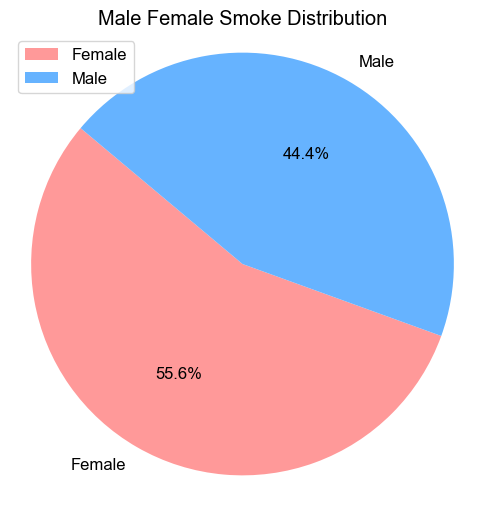

In [1623]:
male_female_smoke_distribution()

1. This pie chart shows the distribution of smokers by gender: 234 females (55.4%) and 187 males (44.6%). The female segment indicates a higher proportion of smoking among women in the dataset.

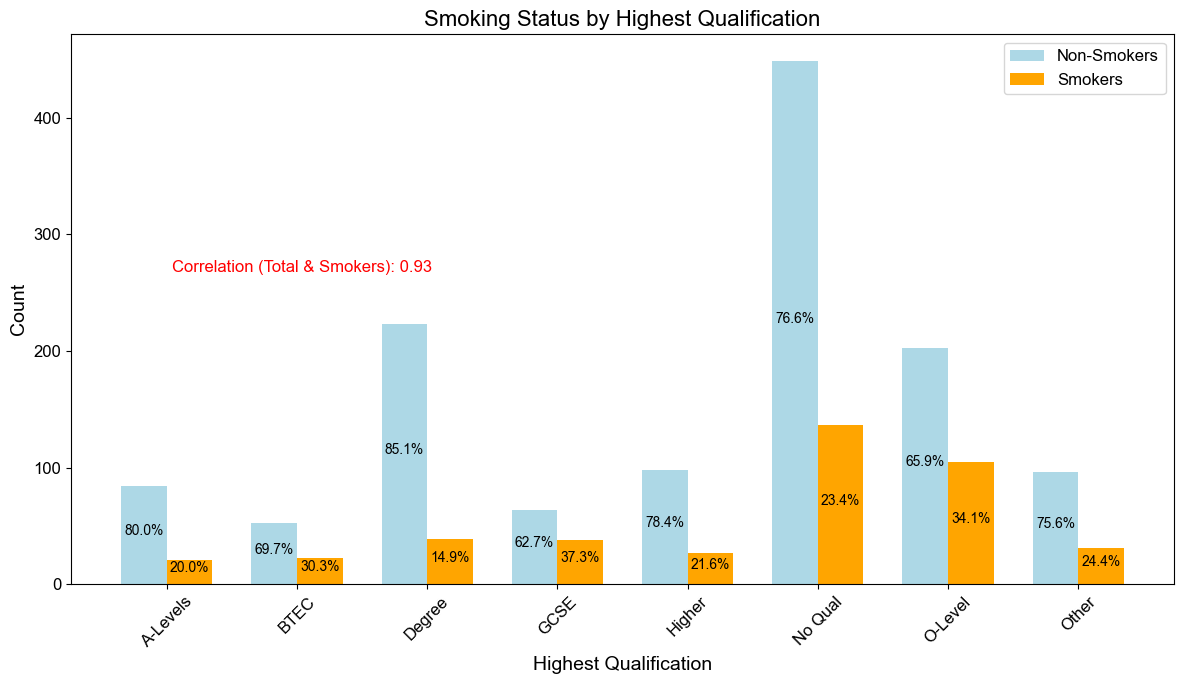

In [1624]:
smoke_against_qualification()

2. he bar chart depicts education versus smoker ratio. Among the GCSE/O Level holders are a lot of smokers, 105, while for A Levels and Degree holders, it is relatively less. All over, there are on average 158.75 non-smokers for every 52.63 smokers. Also, from the higher variance in the case of nonsmokers of 17,672.5 relative to the one of smokers of 1,894.84, it can be deduced that smoking is more consistent among the educational levels, while those that do not smoke are more mixed up. This tends to point to the fact that it may suggest education is a factor in lowered smoking.

/var/folders/wk/6g53_52x66xbm6gmgx0krkb40000gn/T/ipykernel_2074/431702028.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  line_chart_data = df.groupby(['age_group', 'marital_status'])['amt_total'].mean().reset_index()


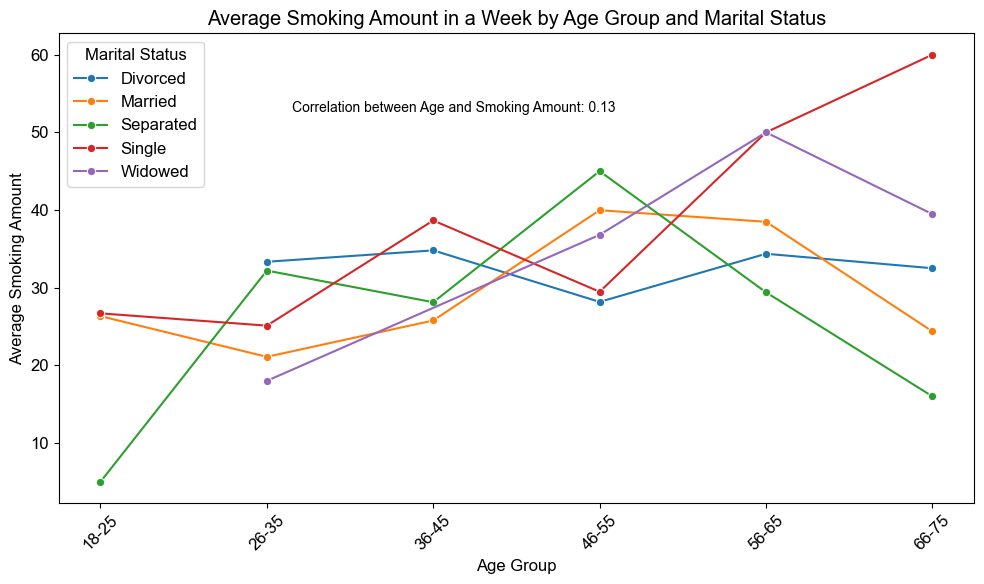

In [1625]:
line_chart_maritalstatus_age()

3. Line chart depicts the average smoking habits of people, differentiated by age group and marital status. Noticeably, smoking peaks among singles and divorced people within the 26-35 age group. It can be noticed that the covariance between age and smoking is positive, which means with the transition of different stages of age, smoking behaviour tends to increase among single or divorced.

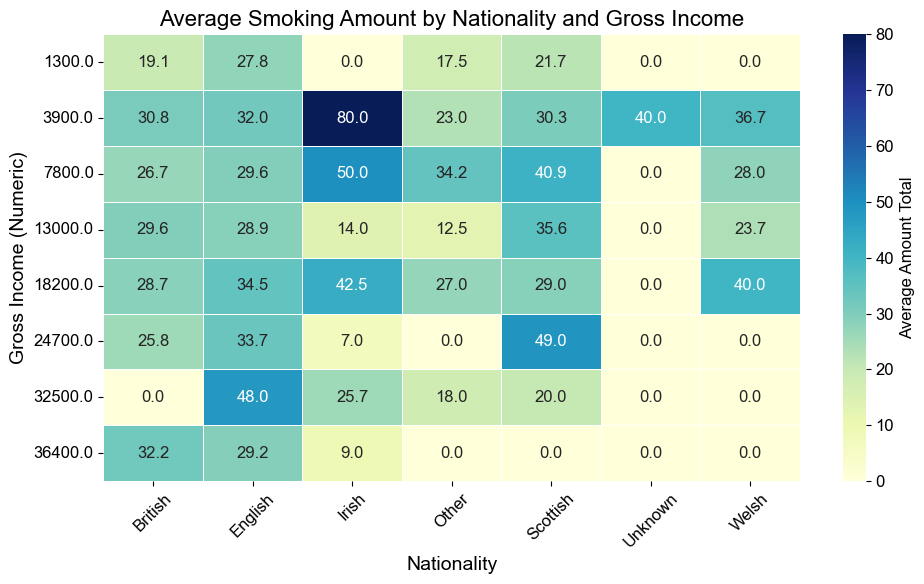

In [1626]:
average_smoke_by_nationality_grossincome()

4.The most striking feature of this heatmap is the negative correlation between income and smoking among the Irish. The highest rate of smoking, 80%, is among those earning from £3,900 to £7,800, while for much higher incomes, such as £36,400, it is considerably less.

Conclusion: These findings have some interesting trends in smoking behavior among different demographic groups.
Surprisingly, the given dataset shows 55.4% women smoke compared to 44.6% men.
This points to the general trend that is observed: the lower-educated smokers, and especially those who had no qualifications, tend to smoke more.
It is much more common for unmarried people and divorcees to smoke, particularly those between the ages of 26 and 35 years. 
Irish individuals with incomes between £3,900 and £7,800 are the heaviest smokers. Interestingly, smoking decreases significantly as income rises.
These findings point to health initiatives directed at the lowest income, less qualified, and certain age or marital status groups, having some actual levers in helping reduce smoking rates.